In [37]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import sys
sys.path.append('/home/iain/Desktop/IEL')
from DataGeneratorPredictors import calculateWaterAndLevelDifference

# Daily Generated Data

In [38]:
# Read in the Daily_Generated_Data.csv file
daily = pd.read_csv('/home/iain/Desktop/IEL/Data/Generated Data/Daily Generated Data.csv')
daily = calculateWaterAndLevelDifference(dataframe=daily, daily=True)
daily.describe()

,Precipitation,Flow Rate,Water Level,Water Difference,Level Difference
count,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.000000
mean,5.472204,3.803334,0.523357,-9.491756e+04,-0.000081
std,22.353029,5.386168,0.276462,9.144170e+05,0.211565
min,0.000000,0.007000,0.121000,-4.489407e+06,-1.661000
25%,0.000000,0.697250,0.319000,-2.603097e+05,-0.097000
50%,1.200000,2.161500,0.475500,-7.204140e+04,-0.007000
75%,6.600000,4.817250,0.656250,2.751840e+04,0.076000
max,866.000000,55.804000,2.442000,3.398238e+07,2.106000


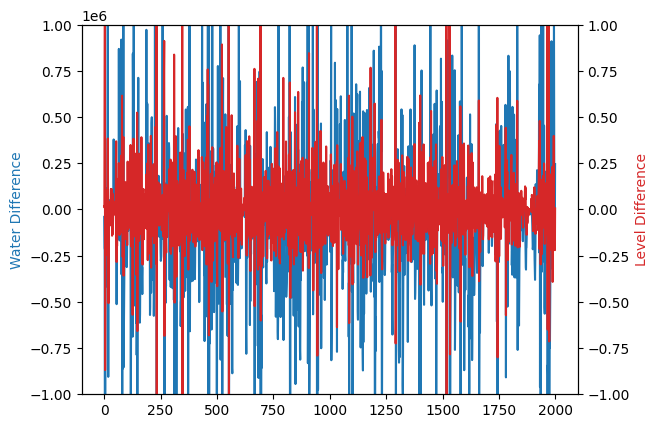

In [39]:
# Plot the water difference and the level derivative against the date with different axis scales
fig, ax1 = plt.subplots()
ax1.plot(daily['Water Difference'].iloc[0:2000])
ax1.set_ylabel('Water Difference', color='tab:blue')
ax1.set_ylim(-1000000, 1000000)
ax2 = ax1.twinx()
ax2.plot(daily['Level Difference'].iloc[0:2000], color='tab:red')
ax2.set_ylabel('Level Difference', color='tab:red')
ax2.set_ylim(-1, 1)
plt.show()

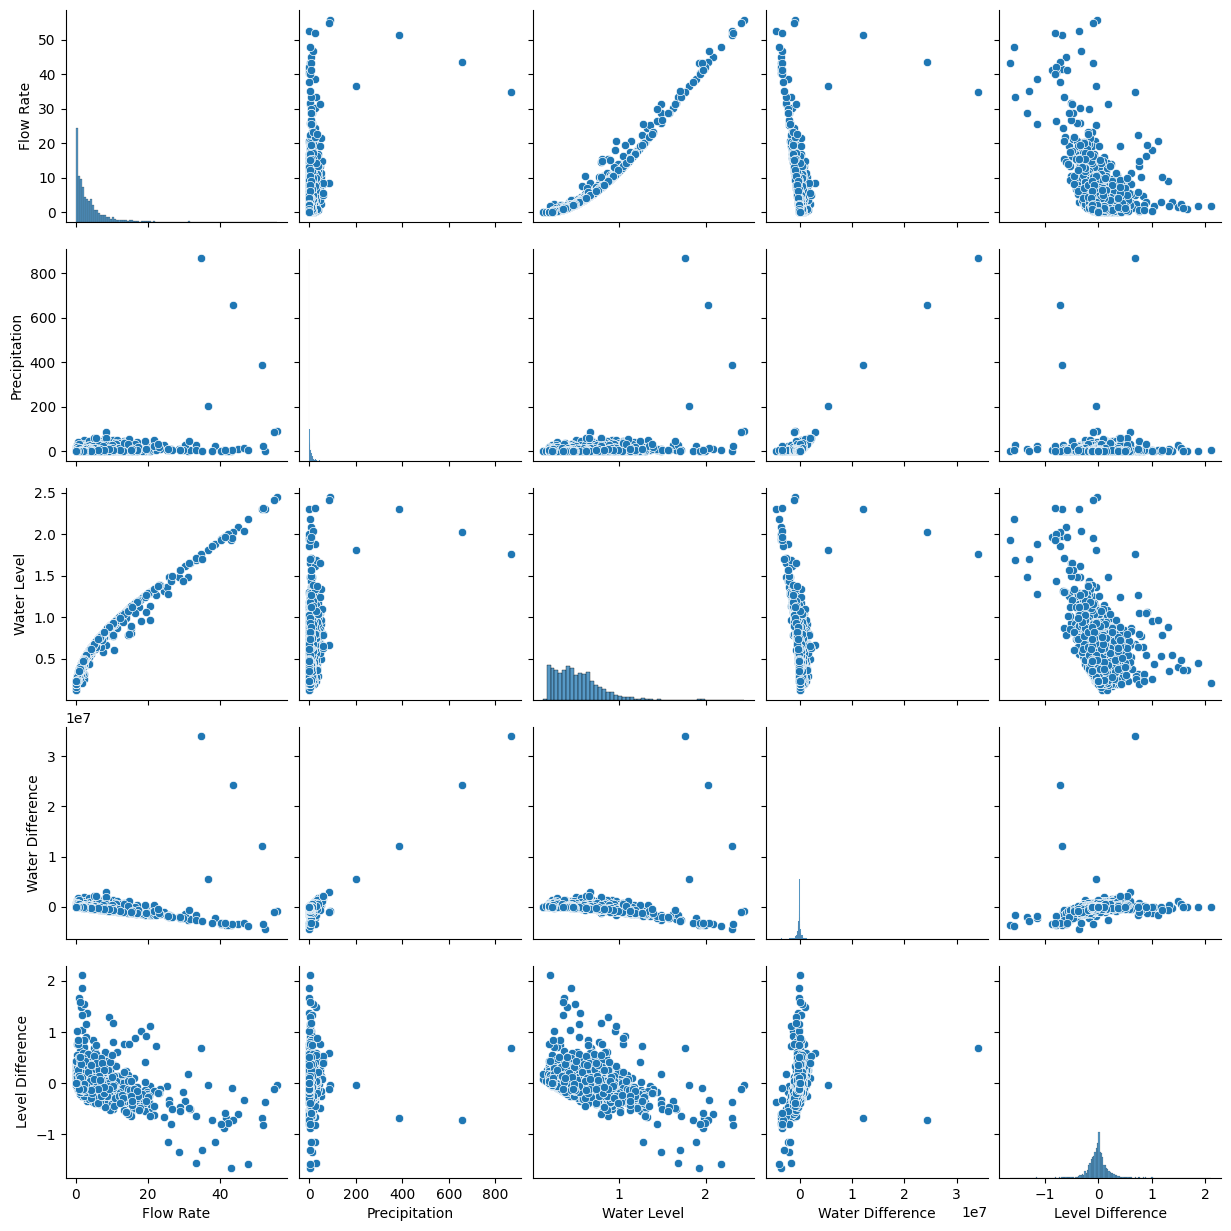

In [40]:
cols = ['Flow Rate', 'Precipitation', 'Water Level', 'Water Difference', 'Level Difference']
sns.pairplot(daily[cols], height=2.5)

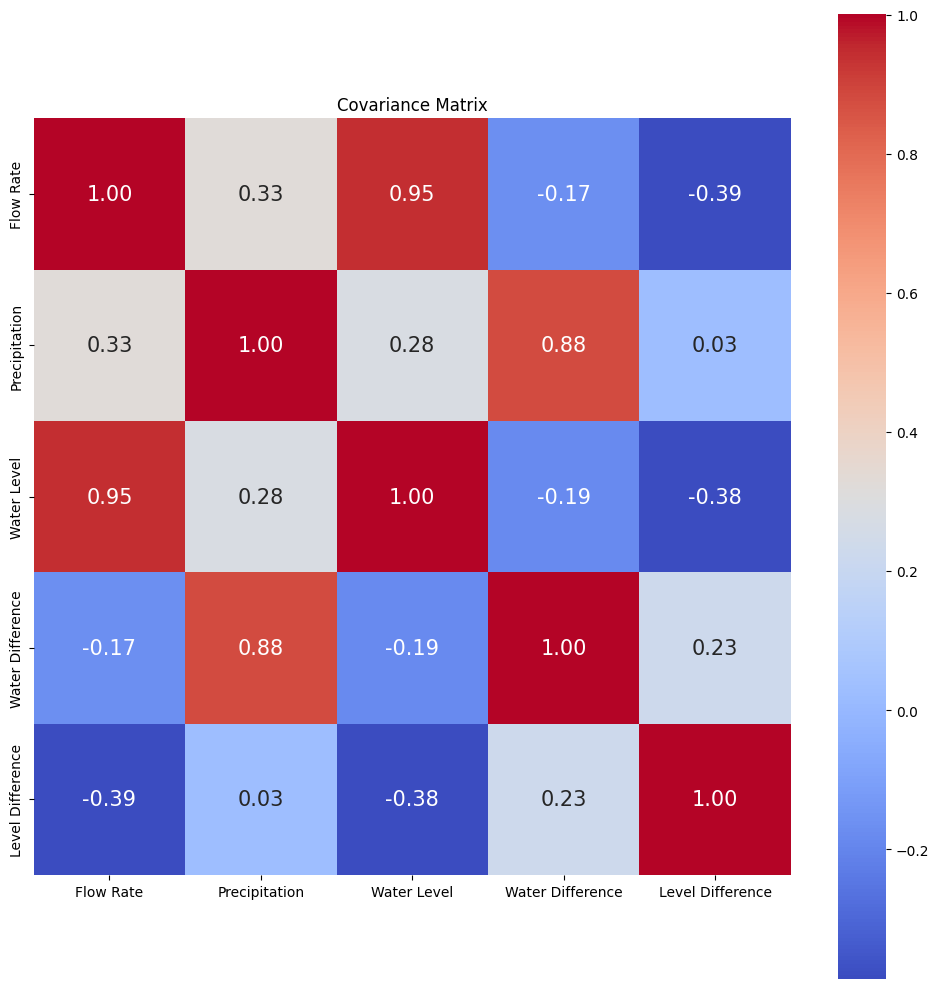

In [41]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(daily[cols].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10, 10))
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, cmap='coolwarm', yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

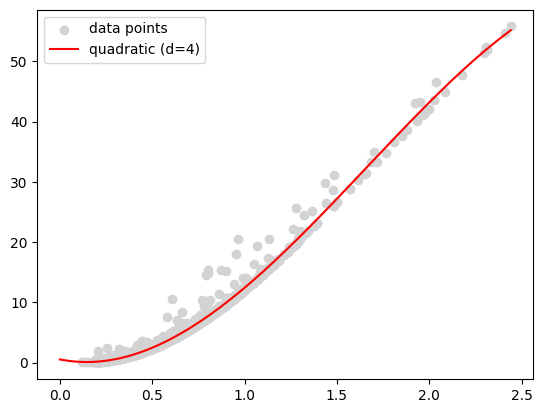

In [42]:
# Fit a polynomial curve to the data
X = daily['Water Level'].values.reshape(-1, 1)
y = daily['Flow Rate'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
quadratic = PolynomialFeatures(degree=4)
X_quad = quadratic.fit_transform(X)
X_quad_test = quadratic.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_quad, y)
y_quad_fit = lr.predict(X_quad)
y_quad_pred = lr.predict(X_quad_test)

# Plot the polynomial curve
plt.scatter(X, y, label='data points', color='lightgray', marker='o')

x = np.linspace(0, max(X), 1000)
y = lr.predict(quadratic.fit_transform(x.reshape(-1, 1)))
plt.plot(x, y, label='quadratic (d=4)', color='red')

plt.legend(loc='upper left')
plt.show()

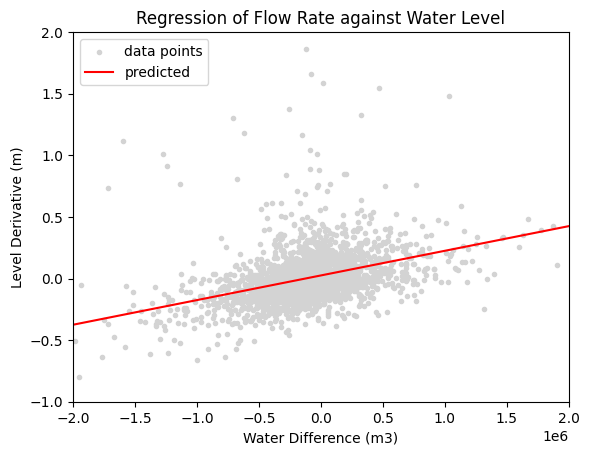

In [43]:
# Remove days with water difference > 2000000 and > 2000000
typical = daily[daily['Water Difference'] < 2000000]
typical = typical[typical['Water Difference'] > -2000000]

# Fit a polynomial curve of Water difference (independent) and level derivative (dependent)
X = typical['Water Difference'].values.reshape(-1, 1)
y = typical['Level Difference'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
quadratic = PolynomialFeatures(degree=1)
X_quad = quadratic.fit_transform(X)
X_quad_test = quadratic.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_quad, y)
y_quad_fit = lr.predict(X_quad)
y_quad_pred = lr.predict(X_quad_test)

# Plot the polynomial curve
plt.scatter(X, y, label='data points', color='lightgray', marker='.')

x = np.linspace(-2000000, 2000000, 1000)
y = lr.predict(quadratic.fit_transform(x.reshape(-1, 1)))
plt.plot(x, y, label='predicted', color='red')

plt.xlim(-2000000, 2000000)
plt.ylim(-1, 2)

plt.legend(loc='upper left')
plt.title('Regression of Flow Rate against Water Level')
plt.xlabel('Water Difference (m3)')
plt.ylabel('Level Derivative (m)')
plt.show()

# Quarter-Hourly Generated Data

In [44]:
# Read in the Quarter_Hourly_Generated_Data.csv file
quarter_hourly = pd.read_csv('/home/iain/Desktop/IEL/Data/Generated Data/Quarter Hourly Generated Data.csv')
quarter_hourly = calculateWaterAndLevelDifference(dataframe = quarter_hourly, daily=False)
quarter_hourly.describe()

,Precipitation,Flow Rate,Water Level,Water Difference,Level Difference
count,298752.000000,298752.000000,298752.000000,2.987520e+05,298752.000000
mean,0.057002,3.803333,0.523359,-9.887236e+02,-0.000001
std,0.790912,6.014211,0.301281,3.358807e+04,0.029324
min,0.000000,0.000000,0.100000,-5.447700e+04,-2.500000
25%,0.000000,0.548000,0.305000,-3.722400e+03,-0.002000
50%,0.000000,2.045000,0.474000,-1.393200e+03,0.000000
75%,0.000000,4.750000,0.660000,-2.205000e+02,0.001000
max,163.000000,60.530000,2.600000,6.906438e+06,2.500000


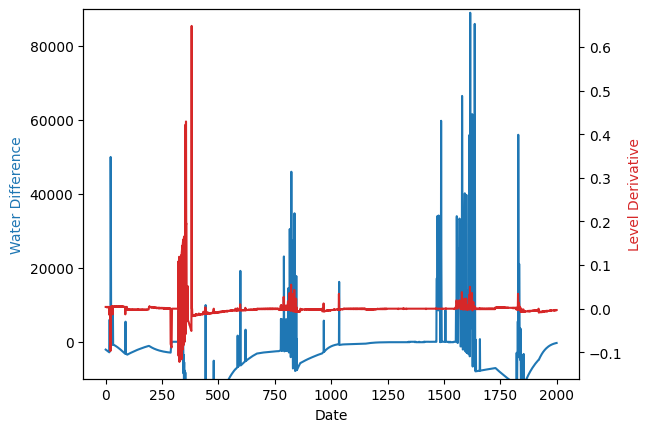

In [45]:
# Plot the water difference and the level derivative against the date with different axis scales
fig, ax1 = plt.subplots()
ax1.plot(quarter_hourly['Water Difference'].iloc[0:2000])
ax1.set_xlabel('Date')
ax1.set_ylabel('Water Difference', color='tab:blue')
ax2 = ax1.twinx()
ax2.plot(quarter_hourly['Level Difference'].iloc[0:2000], color='tab:red')
ax2.set_ylabel('Level Derivative', color='tab:red')

# Set the level derivative axis to -0.005 to 0.030
ax1.set_ylim(-10000, 90000)

plt.show()

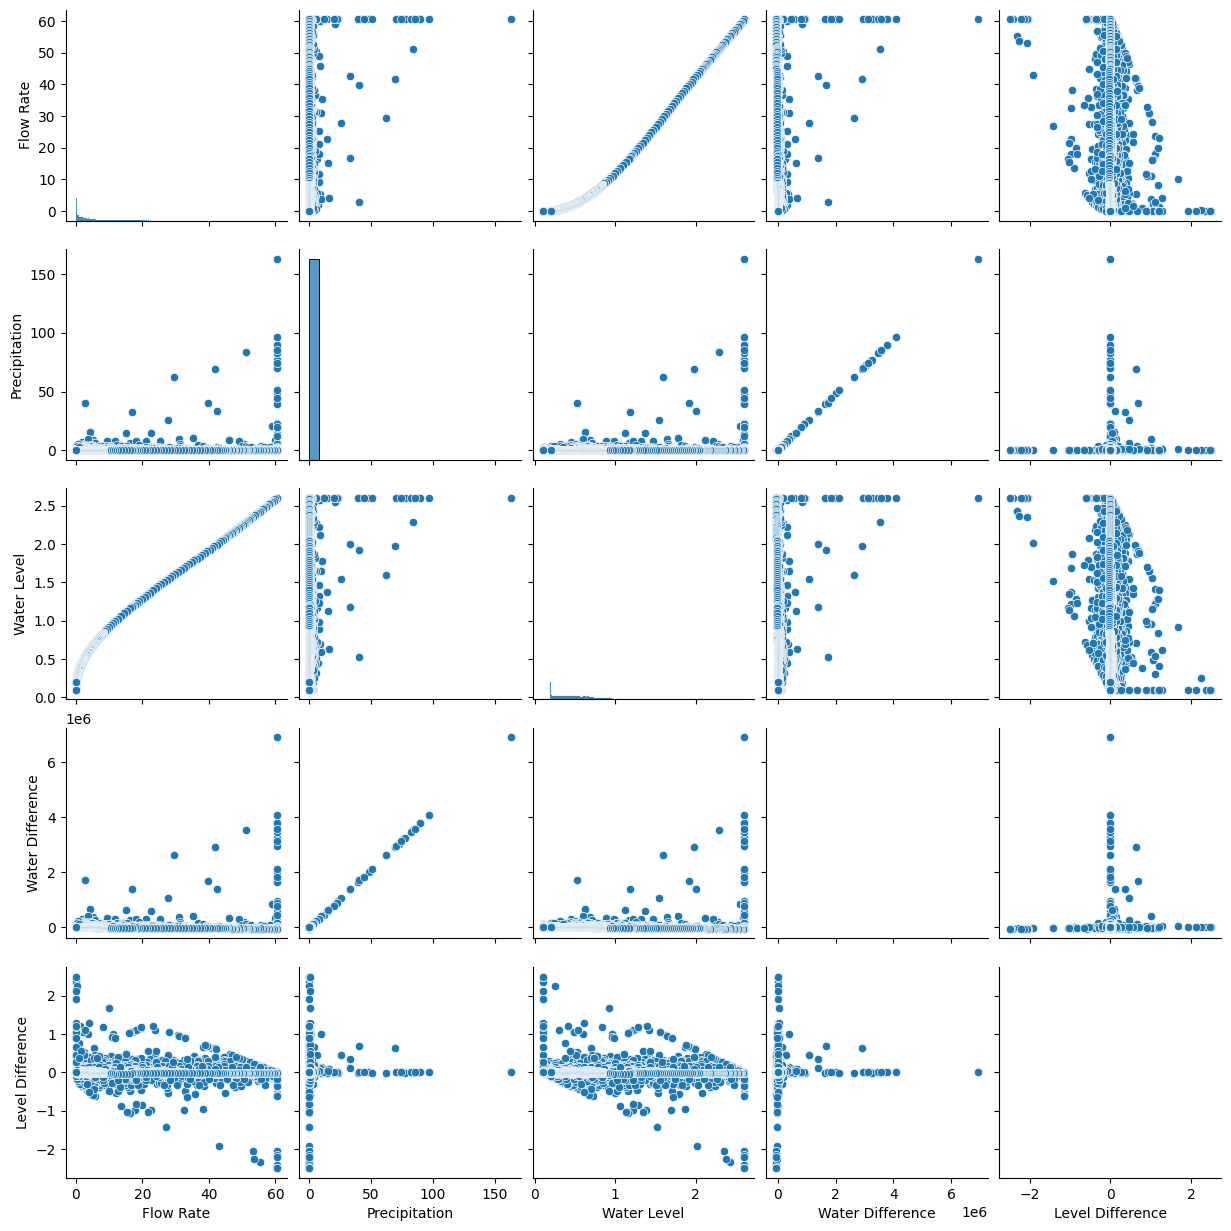

In [46]:
cols = ['Flow Rate', 'Precipitation', 'Water Level', 'Water Difference', 'Level Difference']
sns.pairplot(quarter_hourly[cols], height=2.5)

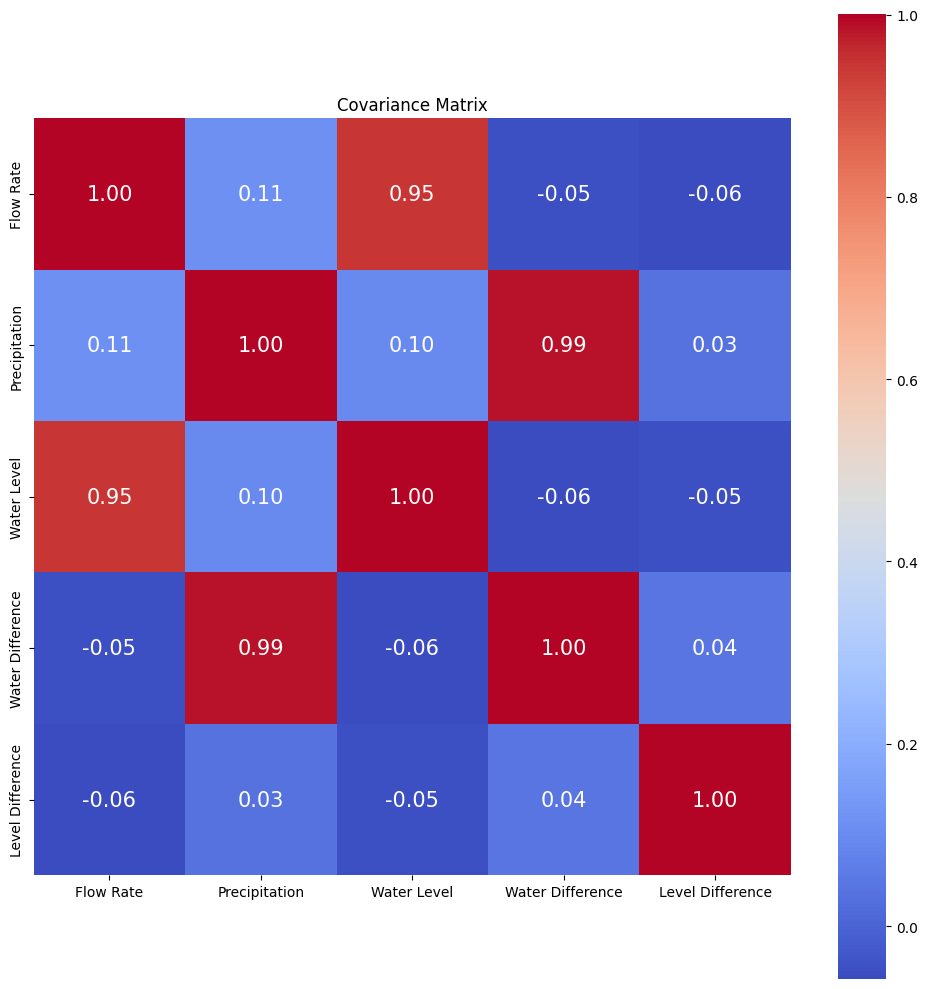

In [47]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(quarter_hourly[cols].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10, 10))
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, cmap='coolwarm', yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

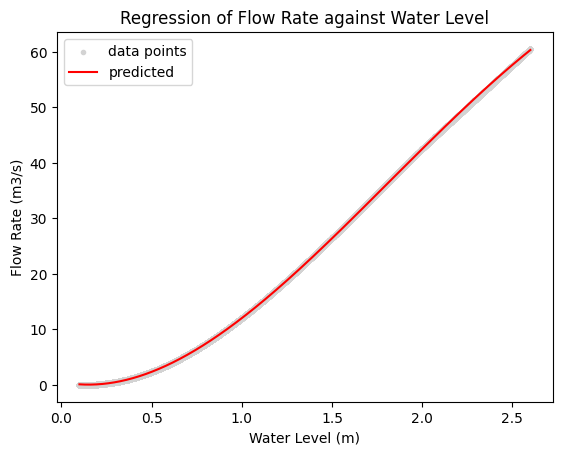

In [48]:
# Fit a polynomial curve to the data
X = quarter_hourly['Water Level'].values.reshape(-1, 1)
y = quarter_hourly['Flow Rate'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
quadratic = PolynomialFeatures(degree=4)
X_quad = quadratic.fit_transform(X)
X_quad_test = quadratic.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_quad, y)
y_quad_fit = lr.predict(X_quad)
y_quad_pred = lr.predict(X_quad_test)

# Plot the polynomial curve
plt.scatter(X, y, label='data points', color='lightgray', marker='.')

x = np.linspace(0.1, max(X), 1000)
y = lr.predict(quadratic.fit_transform(x.reshape(-1, 1)))
plt.plot(x, y, label='predicted', color='red')

plt.legend(loc='upper left')
plt.title('Regression of Flow Rate against Water Level')
plt.xlabel('Water Level (m)')
plt.ylabel('Flow Rate (m3/s)')
plt.show()